In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Trainfile.csv')
test = pd.read_csv('Testfile.csv')

In [3]:
codes, uniques = pd.factorize(data['MSZoning'])
codes
data['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1133    RL
1134    RL
1135    RL
1136    RL
1137    RL
Name: MSZoning, Length: 1138, dtype: object

In [4]:
data

,Idx,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,45,RL,59.0,7227,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,105500
1,2,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,272000
2,3,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,130000
3,4,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
4,5,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1134,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,193879
1134,1135,80,RL,88.0,8471,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,151000
1135,1136,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1136,1137,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,236500


In [5]:
for i in range(len(data.columns)):
    j = 0
    while isinstance(data.iloc[j,i], str) != True and math.isnan(data.iloc[j,i]):
        j+=1
    if (isinstance(data.iloc[j, i], str)) == True :
        data.iloc[:,i], uniques = pd.factorize(data.iloc[:,i])
        test.iloc[:,i], uniques = pd.factorize(test.iloc[:,i])

In [6]:
data = data.replace(-1, np.nan) #replaces all instances of -1 by NaN

In [7]:
data['Alley'].head(20) # if NaN

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    0.0
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Alley, dtype: float64

In [8]:
for i in range(len(data.columns)):
    mean_value=(data.iloc[:,i].mean())
    mean_value_test = (test.iloc[:,i].mean())
    data.iloc[:, i]=data.iloc[:, i].fillna(mean_value) #replaces NaN by mean of the column
    test.iloc[:, i]=test.iloc[:, i].fillna(mean_value_test)

In [9]:
data.head(25) # now NaN is removed for the whole dataframe

,Idx,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,45,0,59.000000,7227,0,0.5,0,0,0,...,0,0.8,0.754464,0.095238,0,6,2008,0,0,105500
1,2,60,0,70.484009,12227,0,0.5,1,1,0,...,0,0.8,0.754464,0.095238,0,7,2008,0,0,272000
2,3,20,0,65.000000,7800,0,0.5,0,1,0,...,0,0.8,0.000000,0.095238,0,6,2009,0,0,130000
3,4,60,0,88.000000,12665,0,0.5,1,1,0,...,0,0.8,0.754464,0.095238,0,2,2007,0,0,281213
4,5,20,0,105.000000,15431,0,0.5,0,1,0,...,0,0.8,0.754464,0.095238,0,4,2009,0,0,555000
5,6,20,0,89.000000,12461,0,0.5,0,1,0,...,0,0.8,1.000000,0.095238,0,7,2006,0,0,262000
6,7,20,0,71.000000,9204,0,0.5,0,1,0,...,0,0.8,0.754464,0.095238,0,8,2008,1,0,124000
7,8,85,0,70.484009,12122,0,0.5,1,1,0,...,0,0.8,0.754464,0.095238,0,7,2008,0,0,178400
8,9,20,0,70.000000,7931,0,0.5,0,1,0,...,0,0.8,0.754464,0.095238,0,6,2008,0,0,155000
9,10,60,1,64.000000,8791,0,0.5,1,1,0,...,0,0.8,0.754464,0.095238,0,5,2008,0,0,207500


In [10]:
data = data.drop(columns = ['Idx'])
test = test.drop(columns = ['Idx'])

In [11]:
data.std(axis = 0).head(20)

MSSubClass        42.519037
MSZoning           0.841260
LotFrontage       22.680339
LotArea         7742.762753
Street             0.066168
Alley              0.120465
LotShape           0.642296
LandContour        0.420058
Utilities          0.000000
LotConfig          0.619488
LandSlope          0.223373
Neighborhood       6.365002
Condition1         1.131696
Condition2         0.248922
BldgType           1.009784
HouseStyle         1.201011
OverallQual        1.374100
OverallCond        1.112681
YearBuilt         30.388180
YearRemodAdd      20.618711
dtype: float64

In [12]:
print(data.shape) # dropped the column on ids

(1138, 80)


In [13]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,45,0,59.000000,7227,0,0.5,0,0,0,0,...,0,0.8,0.754464,0.095238,0,6,2008,0,0,105500
1,60,0,70.484009,12227,0,0.5,1,1,0,0,...,0,0.8,0.754464,0.095238,0,7,2008,0,0,272000
2,20,0,65.000000,7800,0,0.5,0,1,0,1,...,0,0.8,0.000000,0.095238,0,6,2009,0,0,130000
3,60,0,88.000000,12665,0,0.5,1,1,0,1,...,0,0.8,0.754464,0.095238,0,2,2007,0,0,281213
4,20,0,105.000000,15431,0,0.5,0,1,0,1,...,0,0.8,0.754464,0.095238,0,4,2009,0,0,555000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,20,0,64.000000,6762,0,0.5,0,1,0,1,...,0,0.8,0.754464,0.095238,0,7,2006,3,1,193879
1134,80,0,88.000000,8471,0,0.5,1,1,0,0,...,0,0.8,2.000000,0.095238,0,7,2006,0,0,151000
1135,20,0,70.000000,8414,0,0.5,0,1,0,1,...,0,0.8,0.000000,0.095238,0,2,2006,0,0,154500
1136,20,0,70.484009,11838,0,0.5,0,1,0,1,...,0,0.8,0.754464,0.095238,0,6,2009,0,0,236500


In [14]:
devia = data.std()
devia.head(10)

MSSubClass       42.519037
MSZoning          0.841260
LotFrontage      22.680339
LotArea        7742.762753
Street            0.066168
Alley             0.120465
LotShape          0.642296
LandContour       0.420058
Utilities         0.000000
LotConfig         0.619488
dtype: float64

In [15]:
i = []
for j in range(len(data.columns)):
    if devia[j] < 1:
        i.append(j)
        
data = data.drop(data.columns[i], axis=1)
test = test.drop(test.columns[i], axis = 1) 
data

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,45,59.000000,7227,0,0,0,0,6,6,1954,...,0,0,0,0,0,0,6,2008,0,105500
1,60,70.484009,12227,1,1,0,1,6,7,1977,...,282,0,0,0,0,0,7,2008,0,272000
2,20,65.000000,7800,2,2,0,2,5,7,1967,...,0,0,0,0,0,0,6,2009,0,130000
3,60,88.000000,12665,3,2,0,1,8,5,2005,...,39,0,0,0,0,0,2,2007,0,281213
4,20,105.000000,15431,4,2,0,2,10,5,2008,...,72,0,0,170,0,0,4,2009,0,555000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,20,64.000000,6762,11,2,0,2,7,5,2006,...,55,0,0,0,0,0,7,2006,3,193879
1134,80,88.000000,8471,2,2,0,5,6,7,1977,...,12,0,0,0,0,0,7,2006,0,151000
1135,20,70.000000,8414,2,2,0,2,6,8,1963,...,0,0,0,0,0,0,2,2006,0,154500
1136,20,70.484009,11838,11,2,0,2,8,5,2001,...,151,0,0,0,0,0,6,2009,0,236500


In [16]:
test

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,20,68.000000,9571,0,0,0,0,5,3,1958,...,0,0,0,0,0,0,6,2009,0,60000
1,20,68.501901,9790,1,1,0,0,6,5,1967,...,0,0,0,197,0,0,9,2009,1,161500
2,60,41.000000,12393,2,0,0,1,7,5,2004,...,48,0,0,0,0,0,9,2006,1,195000
3,20,100.000000,10004,3,0,0,0,6,6,1964,...,0,0,0,152,0,0,2,2009,1,167000
4,45,55.000000,5500,4,0,0,2,4,6,1956,...,0,0,0,0,0,0,4,2007,1,103200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,20,65.000000,8775,2,0,0,0,5,5,1994,...,64,0,0,0,0,0,4,2007,1,126000
318,50,79.000000,12327,21,0,0,5,8,8,1983,...,40,0,0,0,0,0,9,2009,1,316600
319,20,73.000000,9300,3,1,0,0,5,5,1960,...,0,0,0,143,0,0,4,2010,1,167500
320,75,87.000000,18386,4,0,0,6,7,9,1880,...,0,0,0,0,0,0,5,2008,1,295000


In [17]:
my_data = (data - data.mean())/data.std()
my_data_test = (test - test.mean())/test.std()


In [18]:
X = my_data.iloc[:,0:len(data.columns)-1]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,len(data.columns)-1:len(data.columns)].values
theta = np.zeros([1,len(data.columns)])

alpha = 0.01
iters = 1000

In [19]:
#computecost
def computeCost(X,y,theta):
    error = np.power(((X @ theta.T)-y),2)
    return np.sum(error)/(2 * len(X))

In [20]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the grdaient descent and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)
finalCost = computeCost(X,y,g)
print(finalCost)

[[-5.63251847e-16 -9.67518443e-02 -9.26927477e-03  4.10492329e-02
   3.65180425e-02 -2.64968351e-02 -2.09734333e-03 -1.17568517e-02
   3.58232781e-01  5.87573143e-02  1.20704170e-01  5.63604760e-02
  -1.28746866e-02  6.06148050e-03  6.04847438e-02  1.01360928e-02
   6.46575634e-02  1.19607642e-02 -2.24932117e-02  4.82818247e-02
   9.78672385e-02  1.01601645e-01 -7.75729083e-04  1.55496629e-01
   4.52800956e-02  2.29841375e-02  9.93638055e-02  5.85806231e-02
   8.63328700e-04  1.21969897e-02  2.26915462e-02  6.63008091e-02
  -2.01241193e-02  1.41434162e-05  3.30606260e-03 -4.38685201e-03
   5.29603716e-02]]
0.10177028965285591


Text(0.5, 1.0, 'Error vs. Iterations. We can stop after about 400 iterations.')

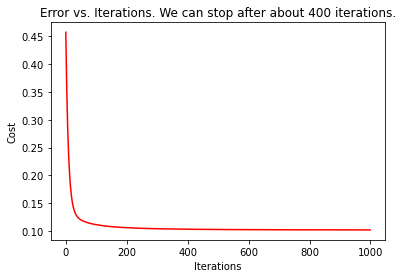

In [21]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Iterations. We can stop after about 400 iterations.') 

In [22]:
X = my_data_test.iloc[:,0:len(data.columns)-1]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data_test.iloc[:,len(data.columns)-1:len(data.columns)].values

In [23]:
my_data_test

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,-0.827980,-2.574258e-02,-0.116678,-1.293688,-0.293431,-0.37928,-0.679278,-0.746057,-2.246636,-0.481302,...,-0.690755,-0.329331,-0.123492,-0.272447,-0.077756,-0.111638,-0.108311,0.974433,-2.022007,-1.429418
1,-0.827980,1.457753e-15,-0.102527,-1.134814,0.887628,-0.37928,-0.679278,-0.039497,-0.447092,-0.176891,...,-0.690755,-0.329331,-0.123492,2.923265,-0.077756,-0.111638,1.028950,0.974433,-0.228381,-0.282941
2,0.136250,-1.410576e+00,0.065666,-0.975940,-0.293431,-0.37928,-0.137873,0.667063,-0.447092,1.074579,...,0.067775,-0.329331,-0.123492,-0.272447,-0.077756,-0.111638,1.028950,-1.282886,-0.228381,0.095453
3,-0.827980,1.615542e+00,-0.088699,-0.817066,-0.293431,-0.37928,-0.679278,-0.039497,0.452680,-0.278361,...,-0.690755,-0.329331,-0.123492,2.193280,-0.077756,-0.111638,-1.624658,0.974433,-0.228381,-0.220816
4,-0.225336,-6.925144e-01,-0.379725,-0.658192,-0.293431,-0.37928,0.403531,-1.452617,0.452680,-0.548949,...,-0.690755,-0.329331,-0.123492,-0.272447,-0.077756,-0.111638,-0.866484,-0.530447,-0.228381,-0.941459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-0.827980,-1.796130e-01,-0.168111,-0.975940,-0.293431,-0.37928,-0.679278,-0.746057,-0.447092,0.736344,...,0.320618,-0.329331,-0.123492,-0.272447,-0.077756,-0.111638,-0.866484,-0.530447,-0.228381,-0.683925
318,-0.104808,5.384490e-01,0.061401,2.042666,-0.293431,-0.37928,2.027746,1.373623,2.252225,0.364286,...,-0.058647,-0.329331,-0.123492,-0.272447,-0.077756,-0.111638,1.028950,0.974433,-0.228381,1.468967
319,-0.827980,2.307081e-01,-0.134188,-0.817066,0.887628,-0.37928,-0.679278,-0.746057,-0.447092,-0.413655,...,-0.690755,-0.329331,-0.123492,2.047283,-0.077756,-0.111638,-0.866484,1.726872,-0.228381,-0.215168
320,0.497836,9.487701e-01,0.452902,-0.658192,-0.293431,-0.37928,2.569150,0.667063,3.151997,-3.119537,...,-0.690755,-0.329331,-0.123492,-0.272447,-0.077756,-0.111638,-0.487397,0.221993,-0.228381,1.224988


In [24]:
# x is 322 x 70
#theta is 1 x 70
new_y = X@g.T
me = test.iloc[:, len(data.columns)-1].mean()
st = test.iloc[:, len(data.columns)-1].std()
for i in range(322):
    new_y[i] = new_y[i] * st + me
    y[i] = y[i] * st + me
new_y

array([[ 94840.80309985],
       [182569.17717366],
       [228212.27070927],
       [190811.77229703],
       [ 50604.39011847],
       [342819.43469758],
       [155813.98847272],
       [206683.82627451],
       [251036.41444722],
       [168261.36256407],
       [ 39133.5631915 ],
       [ 95030.78034883],
       [369768.44521243],
       [335124.3933491 ],
       [103455.34697004],
       [176353.99674684],
       [238394.71606776],
       [158519.0489916 ],
       [112832.28571932],
       [230568.79700515],
       [402927.42591541],
       [315684.0828797 ],
       [186197.54079039],
       [285325.88978721],
       [120612.12416821],
       [126720.53282971],
       [159158.31243655],
       [121857.29245919],
       [238161.66494922],
       [121556.06800994],
       [294528.71244538],
       [113347.94127266],
       [214701.99618295],
       [147978.15268042],
       [156255.69346524],
       [202508.15839114],
       [134129.91180271],
       [335171.02838929],
       [1763

In [25]:
mape = 0
for i in range(322):
    mape += abs(new_y[i] - y[i])/y[i]
mape/=3.22
print('Accuracy =', float(100-mape),'%')

Accuracy = 86.01187343696887 %
